In [13]:
%reload_ext autoreload

import importlib
from main import *
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
style = {'description_width': 'initial'}

In [2]:
distance_threshold = widgets.FloatSlider(
    min=0,
    max=500,
    step=1,
    value=30,
    description='Choose distance threshold (in meters):',
    style=style,
    layout=widgets.Layout(width='50%', height='80px'))
distance_threshold

FloatSlider(value=30.0, description='Choose distance threshold (in meters):', layout=Layout(height='80px', wid…

In [4]:
objects_ = widgets.SelectMultiple(    
    options=['community-centers', 'daycare', 'gas_stations', 'EducationalInstitutions', 'HealthClinics', 'Sport',
            'Synagogue'],
    value=['community-centers'],
    rows=7,
    description='Select types of object to display:',
    style=style,
    layout=widgets.Layout(width='40%'),
    disabled=False)
objects_


SelectMultiple(description='Select types of object to display:', index=(0,), layout=Layout(width='40%'), optio…

In [5]:
neighborhoods = widgets.SelectMultiple(    
    options=['Alef', 'Bet', 'Gimel', 'Dalet', 'Hei', 'Vav', 'Tet', 'Ramot', 'Down Town', 'Yod Alef', 'Old Town', 'Ashan',
            'Noi Beka', 'Darom', 'Nahot'],
    value=['Alef'],
    rows=11,
    description='Select neighborhoods to display the objects iny:',
    style=style,
    layout=widgets.Layout(width='40%'),
    disabled=False)
neighborhoods

SelectMultiple(description='Select neighborhoods to display the objects iny:', index=(0,), layout=Layout(width…

In [104]:
import geopandas
import shapely.wkt

neighborhoods_polygons = return_neighborhoods_coordinates()
m = folium.Map(location=[31.2530, 34.7915], tiles='Stamen Terrain',
         zoom_start=13, control_scale=True, prefer_canvas=True)
neighborhoods_df = pd.DataFrame(columns=['name', 'geometry', 'isolated_count'])
for nei_name, polygon in neighborhoods_polygons.items():
    reversed_polygon = Polygon([(v[1], v[0]) for v in list(polygon.exterior.coords)])
    neighborhoods_df = neighborhoods_df.append({'name': nei_name, 'geometry': reversed_polygon, 'isolated_count': neighborhoods_isolated_nodes[nei_name]}, ignore_index=True)
    folium.GeoJson(reversed_polygon).add_to(m)
    folium.LatLngPopup().add_to(m)
    icon = folium.Icon(**{'prefix': 'fa', 'icon': 'arrow-up'})
    folium.Marker([reversed_polygon.centroid.coords[0][1], reversed_polygon.centroid.coords[0][0]], popup=nei_name, icon=icon).add_to(m)
m

In [204]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='none')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

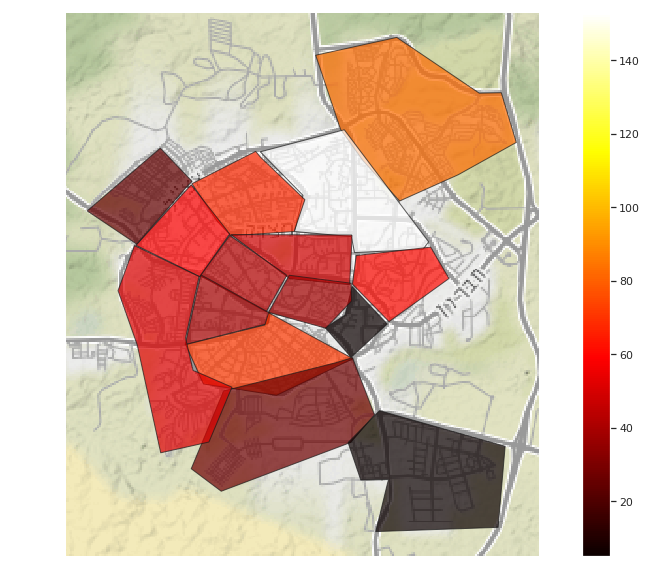

In [205]:
neighborhoods_df['isolated_counts'] = neighborhoods_df['isolated_count'].astype(float)
gdf = geopandas.GeoDataFrame(neighborhoods_df, crs={'init' :'epsg:4326'}, geometry = 'geometry').to_crs(epsg=3857)
ax = gdf.plot(column='isolated_counts',figsize=(16, 10), alpha=0.7, cmap='hot',edgecolor='k', legend=True)
add_basemap(ax, zoom=12)
ax.set_axis_off()


In [202]:
mapp = display_isolated_objects(list(objects_.value), (distance_threshold.value / 1000), list(neighborhoods.value))
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:blue;opacity:0.7;'></span>Community centers</li>
    <li><span style='background:purple;opacity:0.7;'></span>Daycare</li>
    <li><span style='background:cyan;opacity:0.7;'></span>Gas stations</li>
    <li><span style='background:green;opacity:0.7;'></span>Educational institutions</li>
    <li><span style='background:pink;opacity:0.7;'></span>Health clinics</li>
    <li><span style='background:orange;opacity:0.7;'></span>Sport</li>
    <li><span style='background:white;opacity:0.7;'></span>Synagogue</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

mapp.get_root().add_child(macro)

mapp

/data/home/eyalar/anaconda3/envs/bigdata_venv/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


# Statistics

In [56]:
neighborhoods_isolated_nodes = {}
for neighborhood in list(neighborhoods.options):
    g = create_all_graphs(list(objects_.options), distance_threshold.value / 1000)
    relevant_nodes = nodes_per_neighborhood(g, [neighborhood])
    neighborhoods_isolated_nodes[neighborhood] = len(get_isloated_nodes(g, relevant_nodes))

Text(0.5, 1.0, "Number of objects that has no fire hydrants in the radious of 30 meters from them across the neighborhoods of Be'er Sheva")

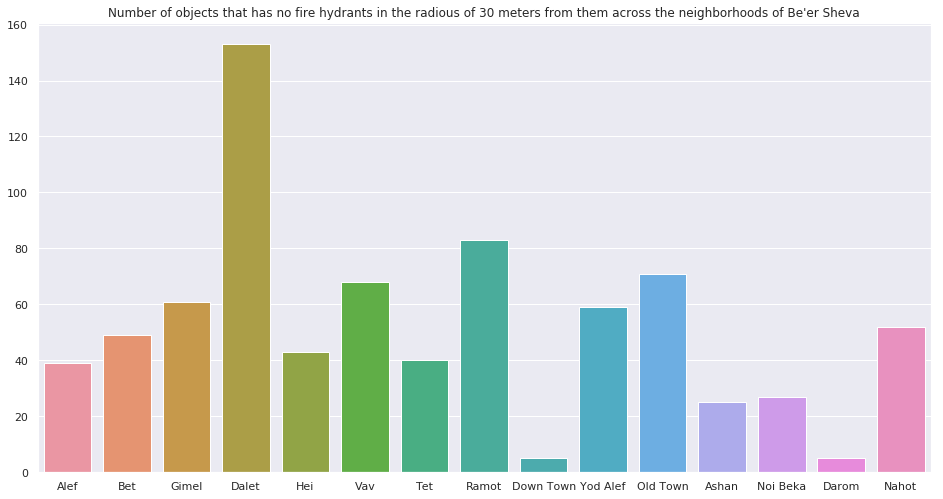

In [24]:
sns.set(rc={'figure.figsize':(16,8.27)})
sns.barplot(x=list(neighborhoods_isolated_nodes.keys()), y=list(neighborhoods_isolated_nodes.values())).set_title('Number of objects that has no fire hydrants in the radious of 30 meters from them across the neighborhoods of Be\'er Sheva')

In [66]:
neighborhood_object_df = pd.DataFrame(columns=['neighborhood', 'object', 'count'])
for neighborhood in list(neighborhoods.options):
    for object_ in list(objects_.options):
        g = create_all_graphs([object_], distance_threshold.value / 1000) # 30 meters
        relevant_nodes = nodes_per_neighborhood(g, [neighborhood])
        neighborhood_object_df = neighborhood_object_df.append({'neighborhood': neighborhood, 'object': object_, 'count': len(get_isloated_nodes(g, relevant_nodes))}, ignore_index=True)

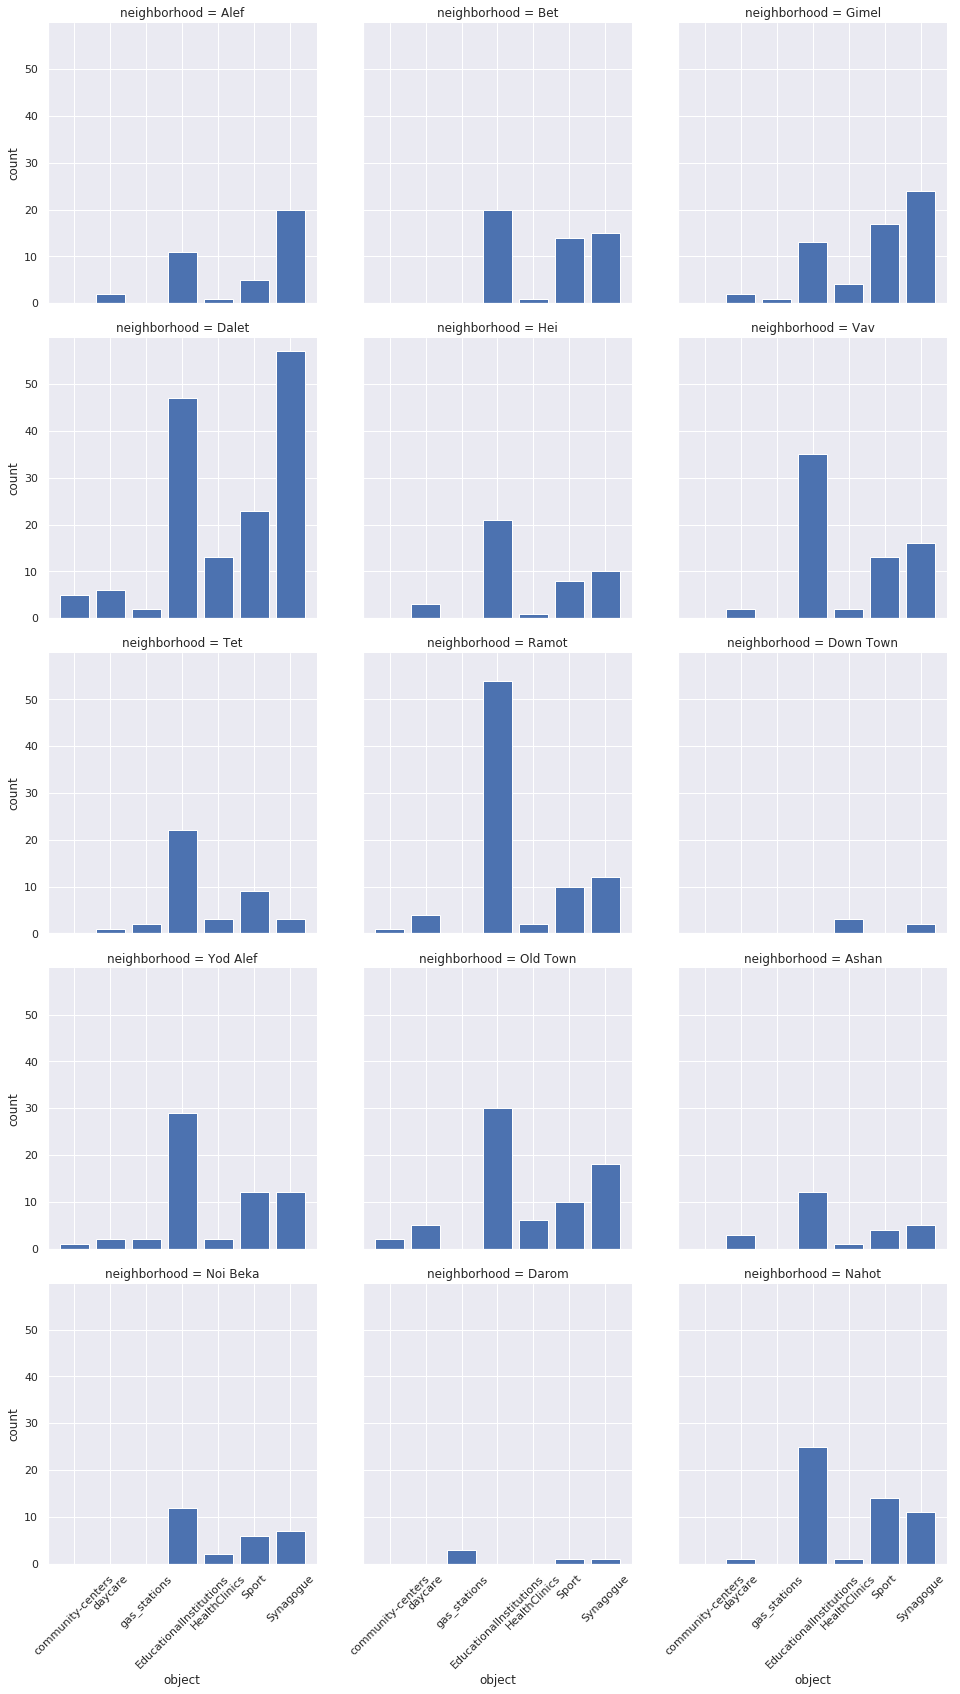

In [86]:
# facetgrid plot
g = sns.FacetGrid(neighborhood_object_df, col="neighborhood", col_wrap=3, height=4.5)
g.map(plt.bar, "object", "count")
g.fig.tight_layout()
g.set_xticklabels(rotation=45)

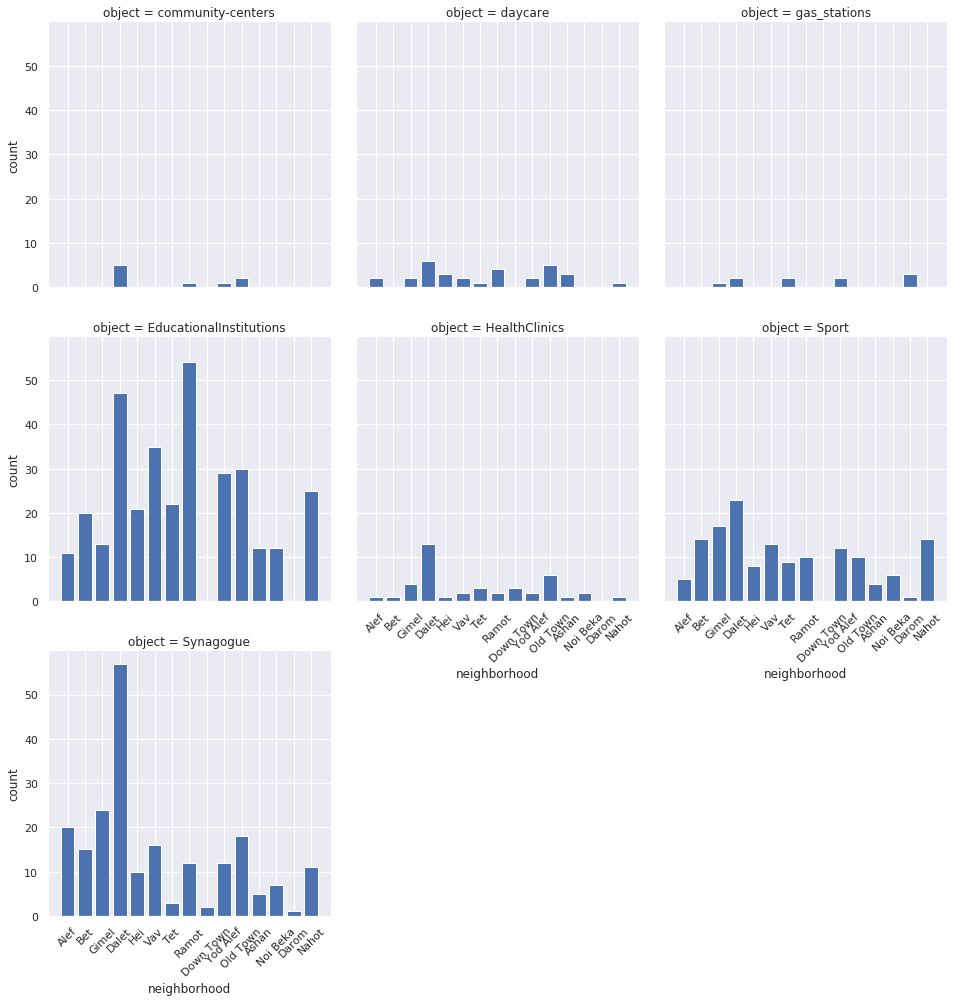

In [87]:
g = sns.FacetGrid(neighborhood_object_df, col="object", col_wrap=3, height=4.5)
g.map(plt.bar, "neighborhood", "count")
g.fig.tight_layout()
g.set_xticklabels(rotation=45)

# Heatmap of objects with no fire hydrants (30 meters away) near them

In [11]:
from folium.plugins import HeatMap
g = create_all_graphs(list(objects_.options), distance_threshold.value / 1000)
relevant_nodes = nodes_per_neighborhood(g, list(neighborhoods.options))
isolated_list = get_isloated_nodes(g, relevant_nodes)
isolated_coordinates = [(g.nodes[node]['x'][1], g.nodes[node]['x'][0]) for node in isolated_list]
m = folium.Map(location=[31.2530, 34.7915], tiles='Stamen Terrain',
         zoom_start=13, control_scale=True, prefer_canvas=True)
HeatMap(isolated_coordinates).add_to(m)
m

# Finding central fire hydrants

In [124]:
top_fire_hydrants_num = widgets.IntText(
    value=10,
    description='Enter number of most important fire hydrants:',
    disabled=False,
    style=style,
    layout=widgets.Layout(width='35%')
)
top_fire_hydrants_num

IntText(value=10, description='Enter number of most important fire hydrants:', layout=Layout(width='35%'), sty…

In [150]:
def all_top_central_fire_hydrants():
    g = create_all_graphs(list(objects_.options), 0.03)
    bet_cen = nx.betweenness_centrality(g)
    bet_cen = {k: v for k, v in bet_cen.items() if k < 2596}
    top_hydrants = sorted(bet_cen, key=bet_cen.get, reverse=True)
    poses = nx.get_node_attributes(g, 'x')
    return top_hydrants, poses, bet_cen

In [148]:
if bet_cen is None:
    print("x")

x


In [154]:
def get_top_central_fire_hydrants(n=10):
    global bet_cen, poses, top_hydrants
    if bet_cen is None:
        top_hydrants, poses, bet_cen = all_top_central_fire_hydrants()
    m = folium.Map(location=[31.2530, 34.7915], tiles='Stamen Terrain',
                 zoom_start=13, control_scale=True, prefer_canvas=True)
    for node in top_hydrants[:n]:
        icon = folium.Icon(**{'prefix': 'fa', 'color': 'red', 'icon': 'arrow-up'})
        folium.Marker([poses[node][1], poses[node][0]], popup=str(bet_cen[node]), icon=icon).add_to(m)
    return m
m = get_top_central_fire_hydrants(top_fire_hydrants_num.value)
m

# Fire hydrants - networkx visualization

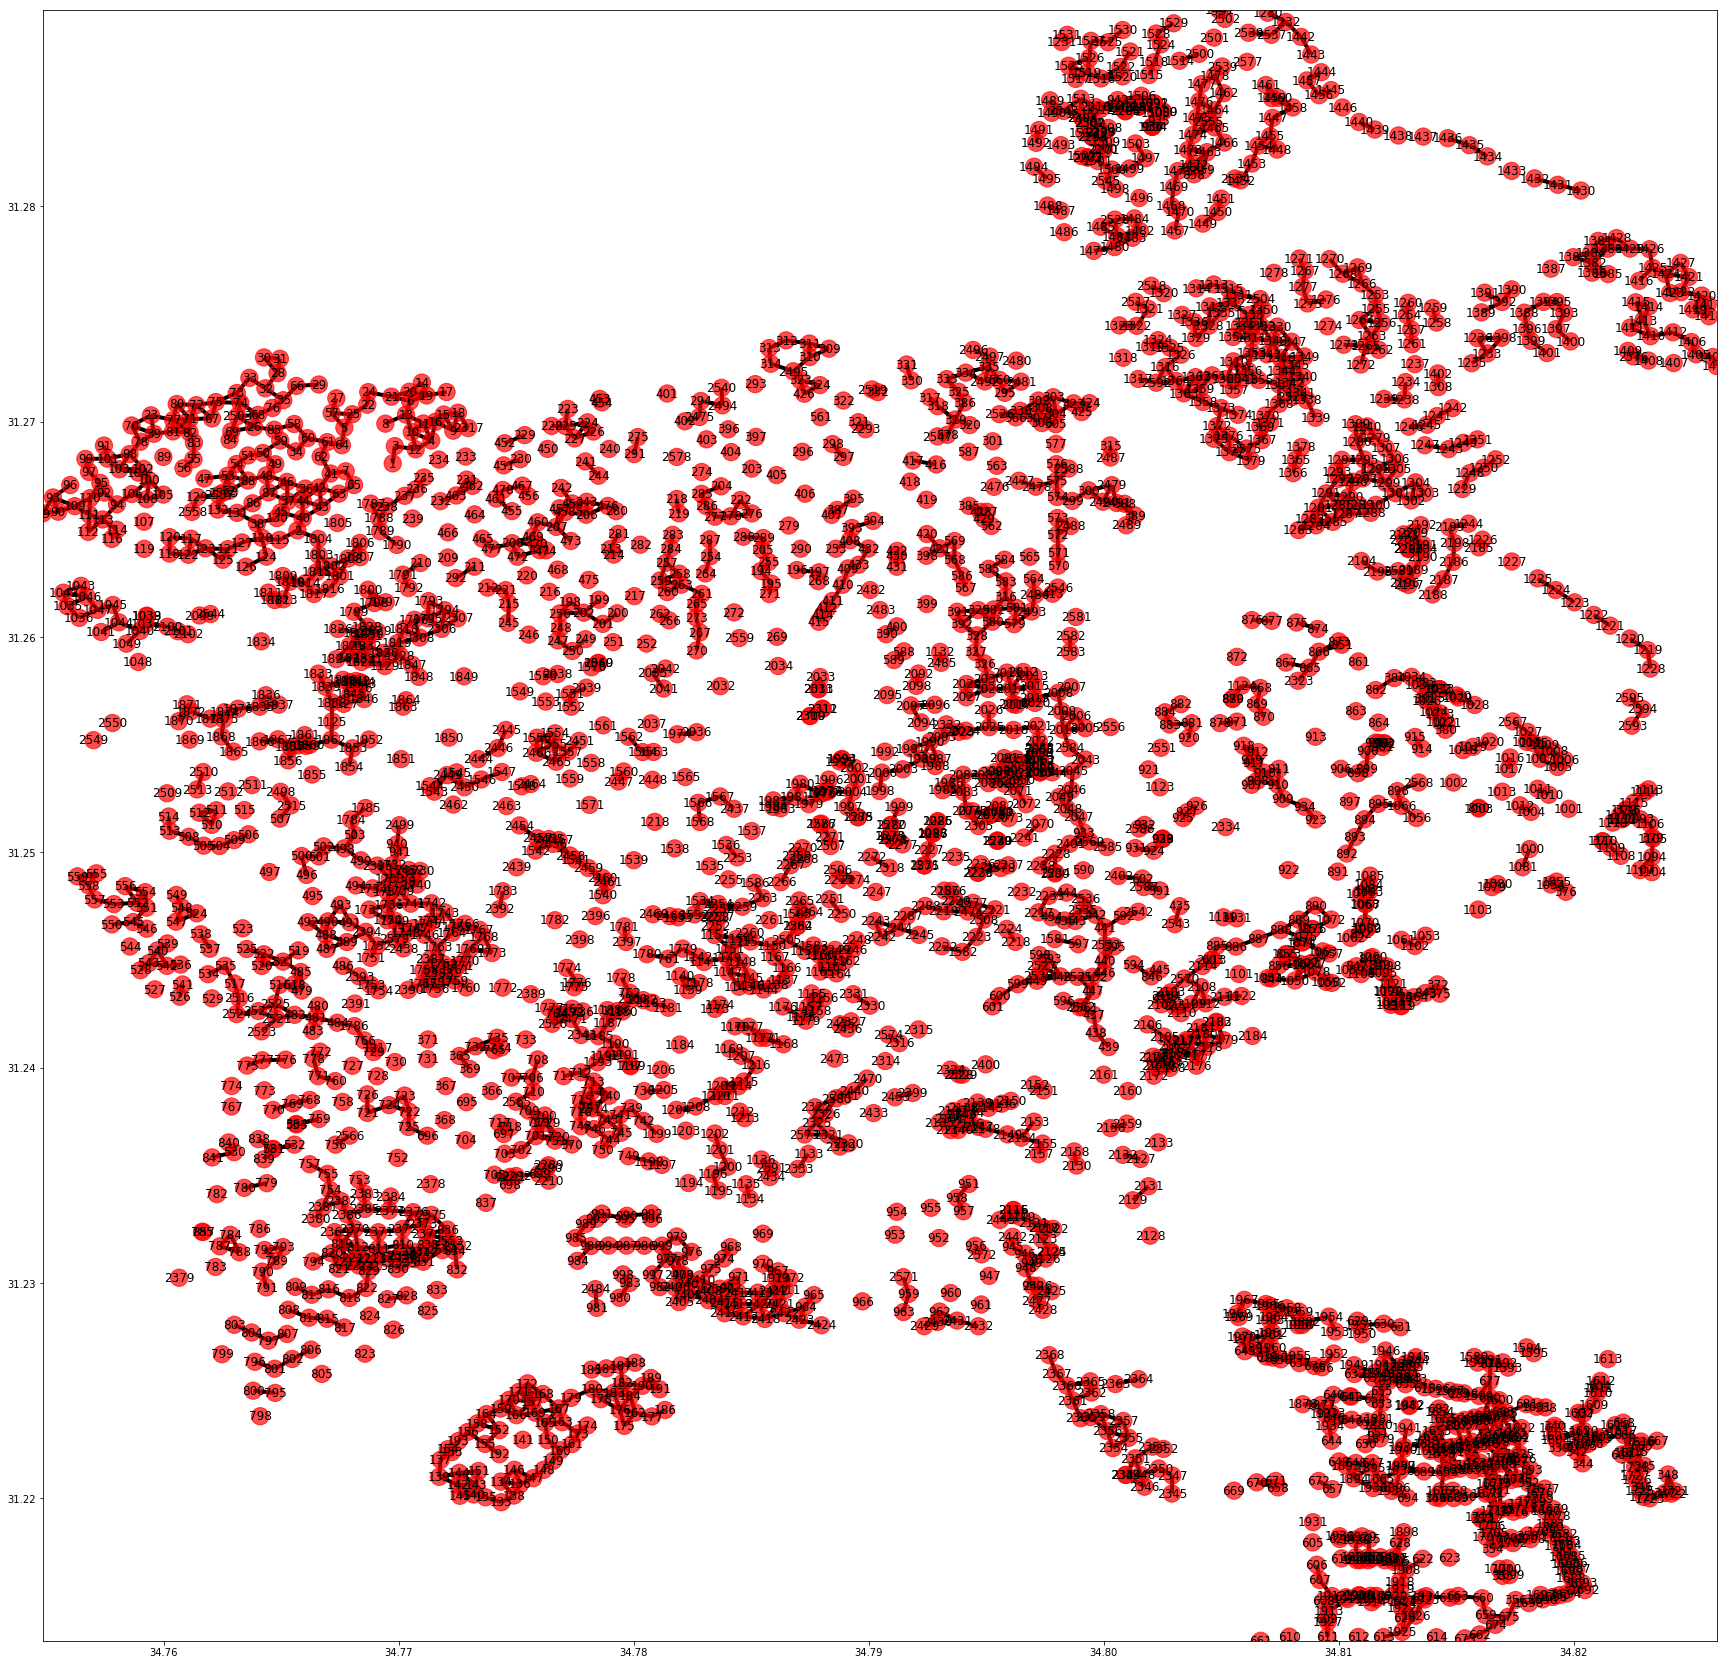

In [7]:
visualize_fire_hydrants_network()

# Create gifs of full network / animation

# תקנה חשובה!!